In [58]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

report_file = '/var/data/wafer/wafer_test_1.xlsx'

meta = pd.read_excel(io=report_file, skiprow=1, nrows=5)

bins = meta.loc[4][2]
bin_list = bins.split(',')

In [59]:
sheet = pd.read_excel(io=report_file, header=8)
sheet

,Product Group,CustPart ID,Part ID,CustLot ID,Adt Cust Lot,Lot ID,Wafer ID,Op.,R/W,Test Time(min),...,Bin68,Bin100,Bin114,Bin140,Bin144,Bin157,Bin158,Bin161,Bin253,Bin999
0,B776,RL6537,38435,J11RU,NaN,ND19020138.00,K1JTM16,CP2,1,49.35,...,0,0,0,0,0,0,0,0,0,0
1,B776,RL6537,38435,J11RU,NaN,ND19020138.00,K1JTM17,CP2,0,51.43,...,0,0,0,0,0,0,0,0,0,0
2,B776,RL6537,38435,J11RU,NaN,ND19020138.00,K1JTM18,CP2,0,46.20,...,0,0,0,0,0,0,0,0,0,0
3,B776,RL6537,38435,J11RU,NaN,ND19020138.00,K1JTM19,CP2,0,51.13,...,0,0,0,0,0,0,0,0,0,0
4,B776,RL6537,38435,J11RU,NaN,ND19020138.00,K1JTM20,CP2,0,50.27,...,0,0,0,0,0,0,0,0,0,0
5,B776,RL6537,38435,J11RU,NaN,ND19020138.00,K1JTM21,CP2,0,51.52,...,0,0,0,0,0,0,0,0,0,0
6,B776,RL6537,38435,J11RU,NaN,ND19020138.00,K1JTM22,CP2,0,51.07,...,0,0,0,0,0,0,0,0,0,0
7,B776,RL6537,38435,J11RU,NaN,ND19020138.00,K1JTM23,CP2,0,51.93,...,0,0,0,0,0,0,0,0,0,0
8,B776,RL6537,38435,J11RU,NaN,ND19020138.00,K1JTM24,CP2,0,52.93,...,0,0,0,0,0,0,0,0,0,0
9,B776,RL6537,38435,J11RU,NaN,ND19020138.00,K1JTM25,CP2,0,52.62,...,0,0,0,0,0,0,0,0,0,0


In [97]:
output={}
bin_col=[]

for i in bin_list:
    if int(i) > 1:
        bin_nm = 'Bin'+str(i)
        bin_col.append(bin_nm)
        output[bin_nm] = 0

for i in sheet.index.values:
    row_data=sheet.loc[i, bin_col]
    c_index = 0
    for j in row_data:
        c_index = c_index+1
        if j > 0:
            curr_bin = bin_col[c_index]
            output[curr_bin] = output[curr_bin]+j

output = sorted(output.items(), key=lambda d: d[1])


<BarContainer object of 73 artists>

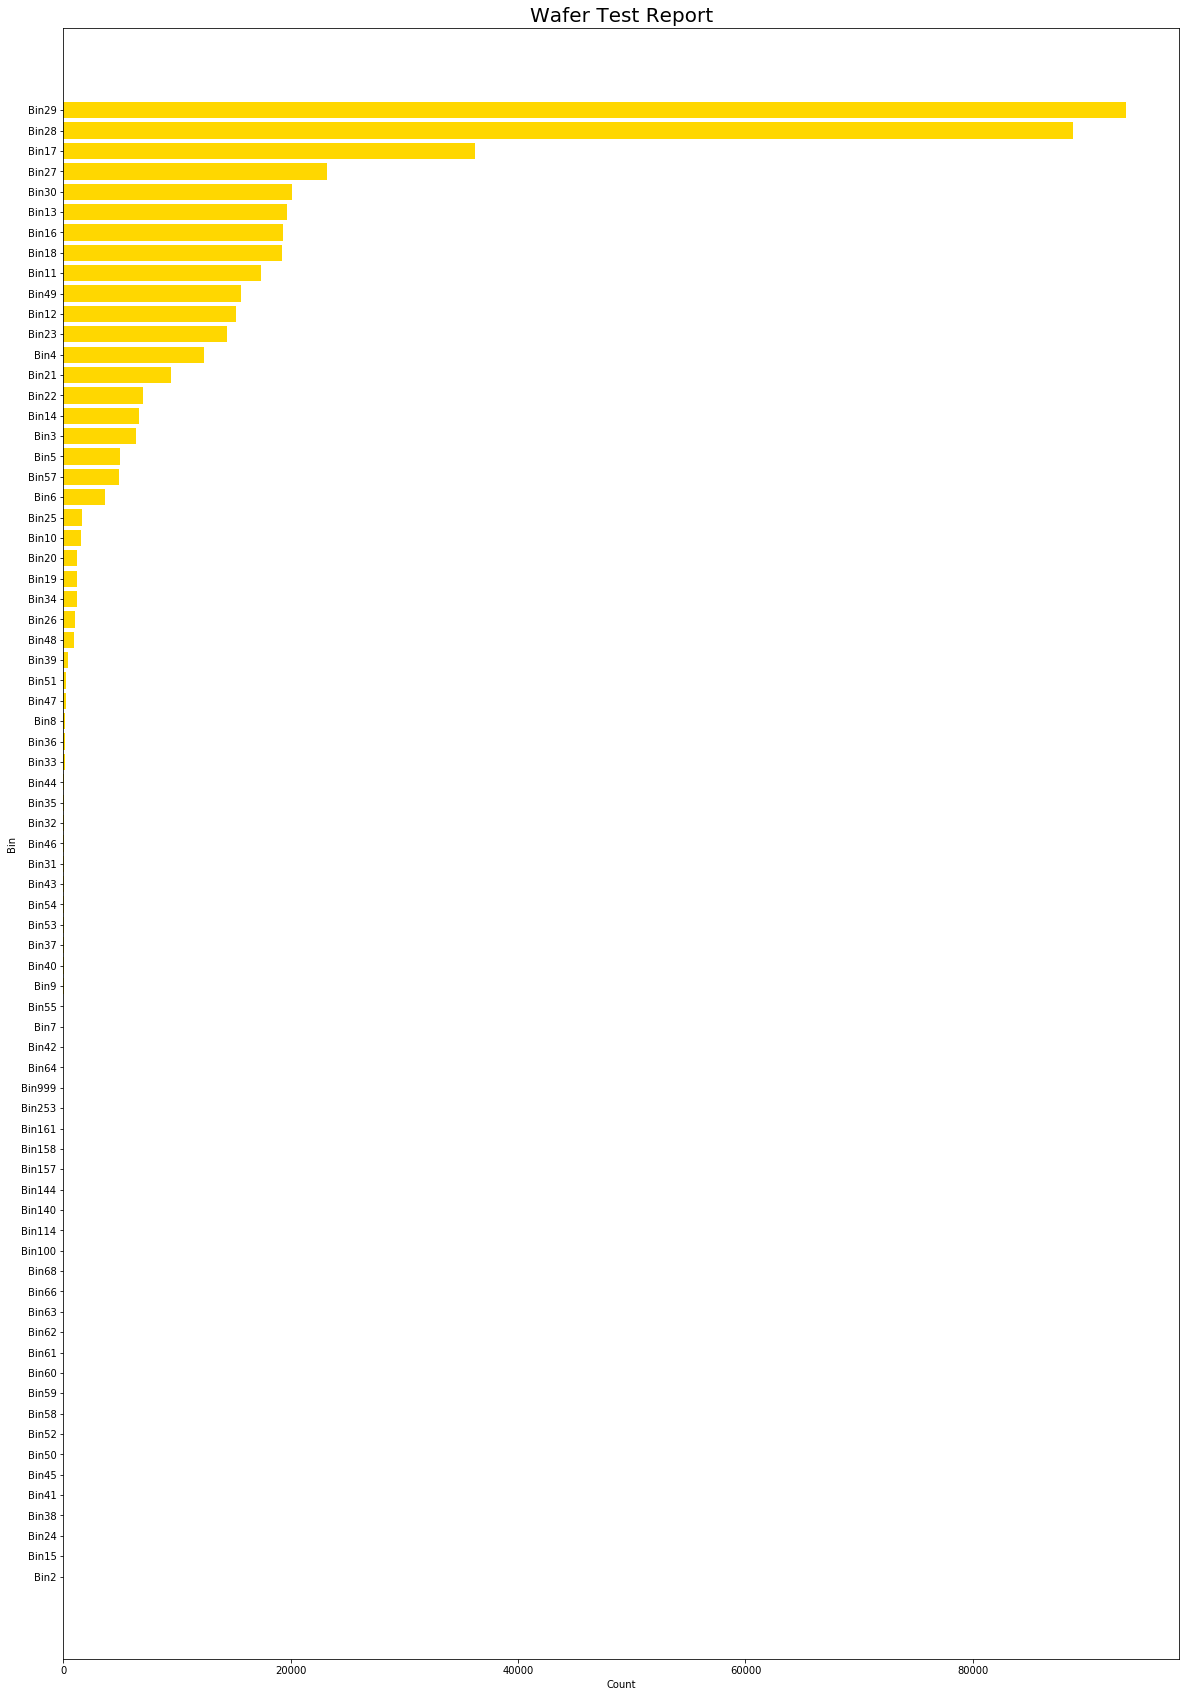

In [104]:
fig=plt.figure(figsize=(20,30))
subplt1=fig.add_subplot(1,1,1)
subplt1.set_title('Wafer Test Report', fontsize=20)
subplt1.set_xlabel('Count')
subplt1.set_ylabel('Bin')

df = pd.DataFrame(output)
subplt1.barh(df[0], df[1], color='#FFD700')